<a href="https://colab.research.google.com/github/DanielZafra4/Pre_entrega1_Zafra/blob/main/Daniel_Zafra_Pre_entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis Car Accident Dataset**

##**Descripción de la temática**

El presente proyecto tiene como objetivo analizar un dataset detallado sobre accidentes de automóviles ocurridos en un área urbana durante enero de 2021. Este conjunto de datos extraido de la plataforma ***Kaggle (***https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset)
 incluye información clave, como la fecha y el día de la semana en que ocurrieron los accidentes, el tipo de control en intersecciones, la gravedad de los accidentes, entre otros.

El análisis se realiza con el propósito de identificar patrones significativos en los accidentes viales, con especial énfasis en comprender los factores que los provocan y aumentan su severidad. Los resultados servirán como base para diseñar estrategias de prevención y mejora en la seguridad vial, buscando reducir la ocurrencia de accidentes y mitigar su impacto.

Específicamente, este análisis busca:


*   **Detectar puntos críticos y horarios de mayor incidencia:** Analizando la distribución geográfica y temporal de los accidentes para identificar zonas de alto riesgo y momentos del día con mayor frecuencia de incidentes.

*  **Evaluar el impacto de factores ambientales y estructurales:** Estudiando cómo las condiciones climáticas, de iluminación y de diseño vial contribuyen a la ocurrencia de accidentes.

*   **Relacionar la gravedad de los accidentes con factores humanos y vehiculares:** Explorando datos sobre vehículos involucrados y su interacción con las condiciones del entorno para entender mejor las causas de accidentes graves.

*   **Proponer medidas preventivas basadas en evidencia:** Desarrollando recomendaciones específicas, como mejoras en el diseño de intersecciones, gestión de tráfico en horarios críticos, campañas de concienciación y adaptaciones en las infraestructuras.

La relevancia de este análisis radica en su potencial para salvar vidas al contribuir al diseño de políticas públicas, intervenciones urbanas y programas de concienciación más efectivos. Al entender mejor los patrones detrás de los accidentes, se pueden establecer estrategias proactivas para minimizar los riesgos y garantizar una movilidad más segura para todos los usuarios de la vía.



##**Importar el Archivo**

En esta ocasión importamos el archivo desde el repositorio de GitHub especificando el raw corresponidente al archivo *Car.csv*, tambien importamos las librerías que vamos a necesitar.

In [1]:
import pandas as pd
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/DanielZafra4/Pre_entrega1/refs/heads/main/Car.csv'
data = pd.read_csv(url, index_col=0,  sep=";")
data.head(10)

,Accident Date,Day of Week,Accident Severity,Latitude,Longitude,Light Conditions,District,Number of Casualties,Number of Vehicles,Police Force,Road Surface Conditions,Road Type,Speed limit,Time,Area,Weather Conditions,Vehicle Type
Index,,,,,,,,,,,,,,,,,
1,01/01/2021,Thursday,Serious,51.512.273,-0.201349,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
2,01/01/2021,Thursday,Slight,51.493.415,-0.185525,Daylight,Kensington and Chelsea,3,2,Metropolitan Police,Dry,Single carriageway,30,11:48:00,Urban,Fine no high winds,Car
3,01/01/2021,Thursday,Serious,51.523.932,-0.15303,Darkness - lights lit,Westminster,1,2,Metropolitan Police,Dry,Single carriageway,30,17:30:00,Urban,Fine no high winds,Motorcycle
4,01/01/2021,Thursday,Slight,51.514.015,-0.151413,Daylight,Westminster,2,2,Metropolitan Police,Wet or damp,Single carriageway,30,9:01:00,Urban,Raining no high winds,Car
5,01/01/2021,Thursday,Serious,51.543.017,-0.137258,Daylight,Camden,1,1,Metropolitan Police,Dry,Dual carriageway,30,5:29:00,Urban,Fine no high winds,Car
6,01/01/2021,Thursday,Slight,51.503.254,-0.223174,Darkness - lights lit,Hammersmith and Fulham,1,1,Metropolitan Police,Dry,One way street,30,2:40:00,Urban,Fine no high winds,Motorcycle
7,01/01/2021,Thursday,Slight,51.563.718,-0.060663,Darkness - lights lit,Hackney,1,2,Metropolitan Police,Dry,Single carriageway,30,21:23:00,Urban,Fine no high winds,Car
8,01/01/2021,Thursday,Slight,51.540.314,-0.070167,Darkness - lights lit,Hackney,1,1,Metropolitan Police,Dry,Single carriageway,30,22:25:00,Urban,Fine no high winds,Car
9,01/01/2021,Thursday,Serious,51.520.825,-0.071712,Daylight,Tower Hamlets,1,1,Metropolitan Police,Dry,One way street,30,3:44:00,Urban,Fine no high winds,Bus


##**Información del Archivo**

Se verifica la cantidad de filas y columnas, además tambien verificamos los nombres de las columnas

In [3]:
data.shape

(119964, 17)

In [4]:
data.columns = data.columns.str.strip()
data.columns

Index(['Accident Date', 'Day of Week', 'Accident Severity', 'Latitude',
       'Longitude', 'Light Conditions', 'District', 'Number of Casualties',
       'Number of Vehicles', 'Police Force', 'Road Surface Conditions',
       'Road Type', 'Speed limit', 'Time', 'Area', 'Weather Conditions',
       'Vehicle Type'],
      dtype='object')

##**Descripción de las columnas**


1.   **Index:** Identificador único para cada registro de accidente, usado para referencia y organización de los datos.

2.   **Accident Date:** Fecha exacta en la que ocurrió el accidente, útil para analizar patrones temporales como tendencias diarias, semanales o estacionales.

3.   **Day of Week:** Día de la semana en el que ocurrió el accidente, permite identificar si ciertos días tienen mayor incidencia de accidentes.

4.   **Accident Severity:** Nivel de gravedad del accidente con los siguientes valores:

  *   **Slight:** Lesiones menores.
  *   **Serious:** Lesiones graves que requieren atención médica significativa.
  *   **Fatal:** Accidentes con al menos una víctima mortal.

5.   **Latitude y Longitude:** Coordenadas geográficas del lugar del accidente, útiles para identificar puntos críticos (hotspots) en mapas.

6.   **Light Conditions:** Condiciones de iluminación en el momento del accidente, con los siguientes valores:

  *   **Daylight:** Luz del día.
  *   **Darkness - lights lit:** Oscuridad con luces encendidas.
  *   **Darkness - no lighting:** Oscuridad sin iluminación.
  *   **Darkness - lights unlit:** Oscuridad con luces apagadas.
  *   **Darkness - lighting unknown:** Oscuridad con iluminación desconocida.

7.   **District:** Distrito donde ocurrió el accidente, proporciona información sobre la ubicación administrativa.

8.   **Number of Casualties:** Número total de víctimas (lesionadas o fallecidas) en el accidente.

9.   **Number of Vehicles:** Número de vehículos involucrados en el accidente.

10.   **Police Force:**  Identificación de la unidad policial responsable del área donde ocurrió el accidente.

11.   **Road Surface Conditions:** Condición de la superficie de la carretera, con los siguientes valores:

  *   **Dry:** Seco.
  *   **Wet or damp:** Mojado o húmedo.
  *   **Frost or ice:** Congelado o con hielo.
  *   **Snow:** Nieve.
  *   **Flood over 3cm. deep:** Inundación mayor a 3 cm de profundidad.

12.   **Road Type:** Tipo de carretera donde ocurrió el accidente, con los siguientes valores:

  *   **One way street:** Calle de un solo sentido.
  *   **Single carriageway:** Carretera de un solo carril.
  *   **Dual carriageway:** Carretera de doble carril.
  *   **Roundabout:** Rotonda.
  *   **Slip road:** Rampa de incorporación o salida.

13.   **Speed Limit:**  Límite de velocidad permitido en la zona del accidente.

14.   **Time:** Hora del día en la que ocurrió el accidente, importante para analizar patrones horarios.

15.   **Area:** Clasificación del área donde ocurrió el accidente:

  *   **Urban:** Zona urbana.
  *   **Rural:** Zona rural.

16.   **Weather Conditions:** Condiciones climáticas en el momento del accidente, con los siguientes valores:

  *   **Fine no high winds:** Clima despejado, sin vientos fuertes.
  *   **Raining no high winds:** Lluvia sin vientos fuertes.
  *   **Fog or mist:** Niebla o neblina.
  *   **Raining + high winds:** Lluvia con vientos fuertes.
  *   **Fine + high winds:** Clima despejado con vientos fuertes.
  *   **Snowing no high winds:** Nevando sin vientos fuertes.
  *   **Snowing + high winds:** Nevando con vientos fuertes.
  *   **Other:** Otras condiciones climáticas.

17.   **Vehicle Type:** Tipo de vehículo involucrado, con los siguientes valores:

  *   **Car:** Automóvil.
  *   **Motorcycle:** Motocicleta.
  *   **Bus:** Autobús.
  *   **Heavy Truck:** Camión pesado.
  *   **Minibus:** Minibús.
  *   **Taxi:** Taxi.
  *   **Other vehicle:** Otro tipo de vehículo.
  *   **Agricultural vehicle:** Vehículo agrícola.
  *   **Pedal cycle:** Bicicleta.
  *   **Ridden horse:** Caballo montado.


Verificamos la información que posee, tipos de datos y faltantes:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119964 entries, 1 to 122977
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Accident Date            119964 non-null  object
 1   Day of Week              119964 non-null  object
 2   Accident Severity        119964 non-null  object
 3   Latitude                 119964 non-null  object
 4   Longitude                119964 non-null  object
 5   Light Conditions         119964 non-null  object
 6   District                 119964 non-null  object
 7   Number of Casualties     119964 non-null  int64 
 8   Number of Vehicles       119964 non-null  int64 
 9   Police Force             119964 non-null  object
 10  Road Surface Conditions  119964 non-null  object
 11  Road Type                119964 non-null  object
 12  Speed limit              119964 non-null  int64 
 13  Time                     119964 non-null  object
 14  Area                     

Se puede observar que cada columna tiene la misma cantidad de no nulos, por lo cual se puede intuir que no hay datos faltantes

##**Hipótesis**
Los accidentes de tránsito representan una de las principales causas de lesiones y muertes en todo el mundo. Estudiar las características y patrones asociados a los accidentes puede ser una herramienta valiosa para mejorar la seguridad vial, identificar factores de riesgo y diseñar políticas de prevención más efectivas.

El dataset en cuestión contiene información detallada sobre accidentes, incluyendo factores temporales (fecha, hora, día de la semana), geográficos (coordenadas, distrito), ambientales (condiciones climáticas, iluminación, tipo de área) y relacionados con la dinámica del accidente (número de vehículos, gravedad, tipo de vehículo involucrado). A partir de esta información, se plantean las siguientes hipótesis y preguntas clave para explorar mediante gráficos y análisis de datos.

El objetivo principal es encontrar patrones y relaciones significativas que permitan entender mejor los accidentes y, potencialmente, contribuir a estrategias de mitigación y prevención.


###**Hipótesis y preguntas clave**


**1.   Distribución temporal de los accidentes:**
  *   Hipótesis: Los accidentes tienen picos específicos según el día de la semana y la hora del día, influenciados por horarios laborales y de ocio.

**2.   Relación entre número de vehículos y gravedad:**
  *   Hipótesis: Los accidentes con más vehículos involucrados tienden a generar más víctimas, debido al mayor nivel de interacción entre los vehículos.

**3.   Límite de velocidad y gravedad del accidente**
  *   Hipótesis: Los accidentes ocurridos en áreas con límites de velocidad más altos (por ejemplo, >80 km/h) tienden a ser más graves que aquellos en áreas con límites más bajos.











##**1.  Distribución temporal de los accidentes:**

###**Cantidad de accidentes por día de la semana**

In [6]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'])
data['Day of Week'] = data['Accident Date'].dt.day_name()

# Se cuenta los accidentes por día
conteo_accidentes = data['Day of Week'].value_counts().sort_index()

# Orden correcto de los días de la semana (de lunes a domingo)
orden_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
conteo_accidentes = conteo_accidentes.reindex(orden_semana)

# Crear el gráfico de barras interactivo
figura = px.bar(
    x=conteo_accidentes.index,
    y=conteo_accidentes.values,
    labels={'x': 'Días de la Semana', 'y': 'Cantidad de Accidentes'},
    title='Cantidad de Accidentes por Día de la Semana',
    color=conteo_accidentes.values,
    color_continuous_scale='blues',
    width=1000,
    height=600
    )

# Configuración adicional para ocultar la barra de colores
figura.update_layout(coloraxis_showscale=False)

# Mostrar el gráfico
figura.show()

A partir del anterior gráfico se pueden extraer las siguientes observaciones:

**1. Mayor número de accidentes durante el fin de semana**
  *   El sábado tiene el mayor número de accidentes, seguido por el viernes. Esto podría deberse a un mayor número de personas viajando por actividades sociales, recreativas y nocturnas, así como un posible aumento del consumo de alcohol durante estas jornadas.

**2. Menor número de accidentes los lunes**
  *   El lunes muestra la menor cantidad de accidentes. Esto podría explicarse porque, al inicio de la semana laboral, las personas tienden a realizar menos viajes innecesarios y estar más concentradas en rutinas diarias.

**3. Accidentes durante los días laborables (martes a viernes)**
  *   Los accidentes durante los días laborables (martes, miércoles, jueves y viernes) tienen un comportamiento relativamente constante, lo que probablemente refleja patrones relacionados con los horarios pico de tráfico, como desplazamientos hacia y desde el trabajo.

**4. Descenso en accidentes los domingos**
  *   Aunque el domingo es parte del fin de semana, muestra menos accidentes en comparación con el sábado. Esto puede deberse a que los domingos suelen ser más tranquilos, con menos desplazamientos y actividades nocturnas.

De acuerdo a lo anterior se puede observar lo siguiente:
*   Patrón de fin de semana: El aumento de accidentes los viernes y sábados podría estar relacionado con una combinación de mayor tráfico, conducción nocturna, y comportamientos de riesgo.
*   Patrón laboral: La relativa uniformidad entre martes y viernes podría reflejar los picos asociados con horarios de trabajo y actividades cotidianas.



###**Cantidad de accidentes por hora**

In [7]:
# Se convierte la columna 'Time' a objetos datetime (hora)
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Se agrupa los datos por hora y se cuenta el número de accidentes
conteo_accidentes_hora = data.groupby(data['Time']).size().reset_index(name='Cantidad de Accidentes')

# Crear el gráfico de líneas
fig = px.line(
    conteo_accidentes_hora,
    x='Time',
    y='Cantidad de Accidentes',
    labels={'Time': 'Hora'},
    title='Cantidad de Accidentes por Hora',
    width=1200,
    height=600
)

# Mostrar el gráfico
fig.show()

En el gráfico anterior, el uso de la hora exacta de los accidentes dificulta la identificación de patrones claros en función del horario. Para simplificar el análisis y facilitar la visualización de tendencias, es necesario redondear las horas al punto más cercano (hora en punto). Esta agrupación permitirá observar con mayor claridad los patrones y momentos críticos en los que ocurren los accidentes

###**Cantidad de accidentes por hora (Redondeado a la hora más cercana)**

In [8]:
# Función para redondear la hora a la hora más cercana (en punto)
def redondear_hora(hora):
    minutos = hora.minute
    if minutos >= 30:
        return datetime.time(hora.hour + 1, 0, 0) if hora.hour < 23 else datetime.time(0, 0, 0)
    else:
        return datetime.time(hora.hour, 0, 0)

# se aplica la función de redondeo a la columna 'Time'
data['HoraRedondeada'] = data['Time'].apply(redondear_hora)

# Se agrupa los datos por la hora redondeada y contar los accidentes
conteo_accidentes_hora_redondeada = data.groupby('HoraRedondeada').size().reset_index(name='Cantidad de Accidentes')

# Crear el gráfico de línea usando las horas redondeadas
fig = px.line(
    conteo_accidentes_hora_redondeada,
    x='HoraRedondeada',
    y='Cantidad de Accidentes',
    labels={'HoraRedondeada': 'Hora (redondeada)'},
    title='Cantidad de Accidentes por Hora',
    width=1300,
    height=600
)

# Mostrar el gráfico
fig.show()

Observando el gráfico anterior es posible observar tendencias en el comportamiento de los accidentes a lo largo del día:

**1.   Horas de mayor incidencia:**
  *   Hay un aumento significativo de accidentes alrededor de las 7:00–9:00 AM, coincidiendo posiblemente con el inicio de la jornada laboral y escolar, lo que genera un aumento en el tráfico.
  *   Otro pico significativo ocurre alrededor de las 4:00–6:00 PM, probablemente relacionado con el horario de salida del trabajo.

**2.   Horas de menor incidencia:**
  *   Las horas con menos accidentes son entre la 1:00 y las 5:00 AM, lo cual tiene sentido dado que hay menos vehículos en circulación debido a que la mayoría de las personas están descansando.

**3.   Distribución general:**
  *   Se observa una forma bimodal, con dos momentos principales de alta incidencia, probablemente relacionados con las horas pico (mañana y tarde).
  *   Entre las 10:00 AM y 3:00 PM, los accidentes tienden a ser más constantes pero menos frecuentes que en los picos.

De acuerdo a lo anterior se puede identificar lo siguiente:

Los accidentes de tráfico tienden a concentrarse durante las horas pico de movilidad, especialmente en la mañana (7:00–9:00 AM) y en la tarde (4:00–6:00 PM), coincidiendo con los horarios de inicio y fin de la jornada laboral. Por otro lado, las horas de la madrugada (1:00–5:00 AM) presentan una menor incidencia, probablemente debido a la reducción significativa del tráfico. Este comportamiento resalta la importancia de tomar medidas de prevención específicas durante los horarios de mayor congestión, como campañas de concienciación, mayor control del tráfico y planificación de recursos de emergencia.








##**2. Relación entre número de vehículos y gravedad:**

###**Relación entre número de vehículos y número de Víctimas**

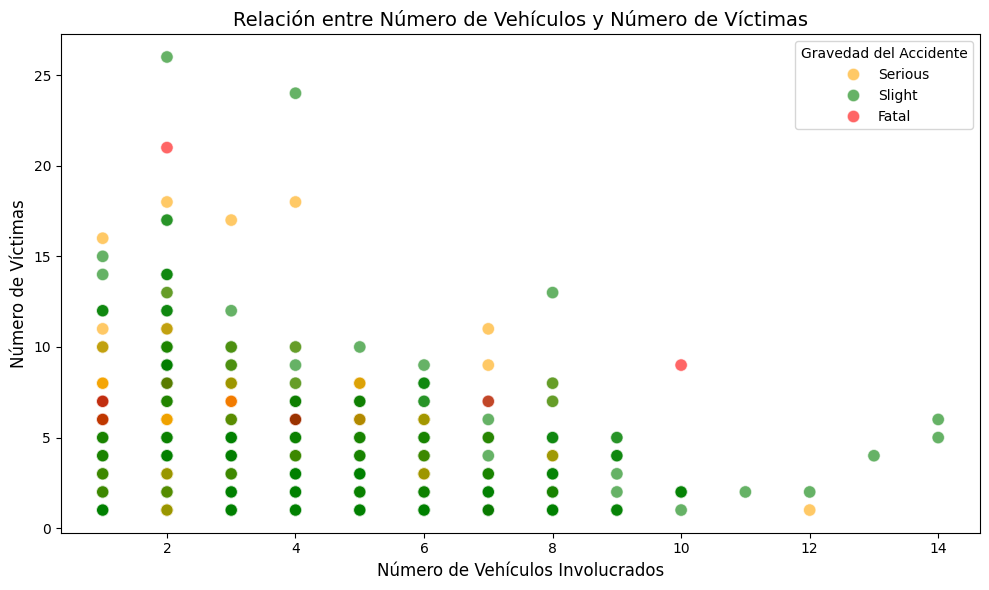

In [9]:
# Se configura el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(
    data=data,
    x='Number of Vehicles',
    y='Number of Casualties',
    hue='Accident Severity',  # Colores según la gravedad del accidente
    palette={'Slight': 'green', 'Serious': 'orange', 'Fatal': 'red'},  # Colores personalizados
    alpha=0.6,  # Transparencia para puntos superpuestos
    s=80  # Tamaño de los puntos
)

# Personalización del gráfico
plt.title('Relación entre Número de Vehículos y Número de Víctimas', fontsize=14)
plt.xlabel('Número de Vehículos Involucrados', fontsize=12)
plt.ylabel('Número de Víctimas', fontsize=12)
plt.legend(title='Gravedad del Accidente', loc='upper right')
plt.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La gráfica muestra la relación entre el número de vehículos involucrados en un accidente (eje X) y el número de víctimas resultantes (eje Y). Los puntos están coloreados según la gravedad del accidente:


*   Verde (Slight): Accidentes con lesiones menores.
*   Naranja (Serious): Accidentes con lesiones graves.
*   Rojo (Fatal): Accidentes con al menos una víctima mortal.

**Análisis posible:**



1.   Tendencia general:
  *   La mayoría de los accidentes tienen entre 1 y 3 vehículos involucrados, y generan de 0 a 5 víctimas, principalmente en la categoría de lesiones menores.
  *   A medida que aumenta el número de vehículos involucrados, también puede aumentar el número de víctimas, aunque no de manera estrictamente lineal.
2.   Accidentes graves y fatales:
  *   Los accidentes más graves (Fatal y Serious) parecen ocurrir incluso con un bajo número de vehículos (1 o 2), lo que indica que no siempre se necesita un gran número de vehículos para tener consecuencias fatales.
  *   Sin embargo, algunos accidentes graves ocurren cuando hay más vehículos involucrados, lo que podría indicar que la interacción entre ellos aumenta la severidad.
3.  Accidentes con múltiples vehículos:
  *   Para accidentes con más de 6 vehículos, predominan las lesiones menores, aunque ocasionalmente aparecen accidentes más graves.

4.   Puntos destacables:
  *   Hay accidentes con más de 10 vehículos que tienen un número relativamente bajo de víctimas, lo cual podría estar relacionado con medidas de seguridad o menor impacto físico en ciertos casos.


Esta gráfica sugiere que, aunque los accidentes con más vehículos tienen el potencial de generar más víctimas, no siempre resulta en un aumento proporcional en la gravedad. Los accidentes fatales y graves pueden ocurrir incluso con un bajo número de vehículos involucrados, lo que resalta la importancia de otros factores como la velocidad, las condiciones climáticas y la superficie de la carretera.

###**Relación entre número de vehículos y gravedad del accidente**

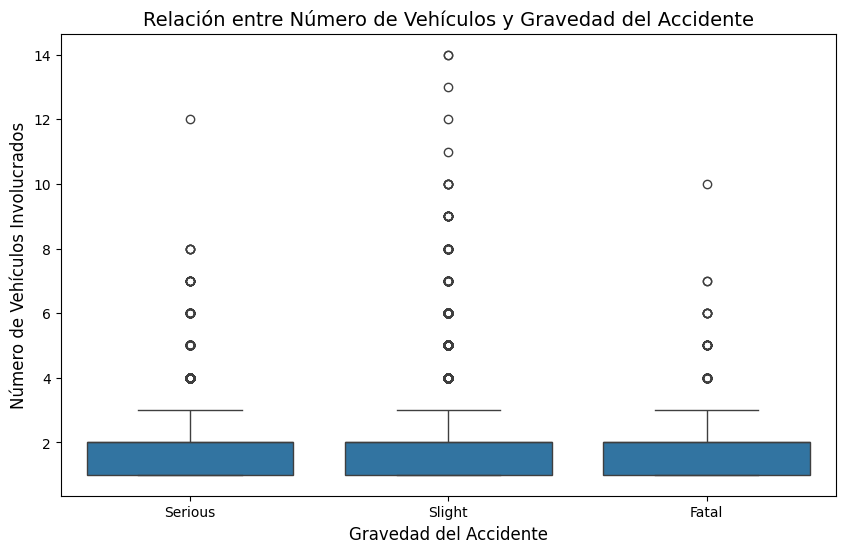

In [10]:
# Crear el gráfico boxpolt
plt.figure(figsize=(10,6))
sns.boxplot(data,
            x='Accident Severity',
            y='Number of Vehicles'
            )
# Personalización del gráfico
plt.title('Relación entre Número de Vehículos y Gravedad del Accidente', fontsize=14)
plt.xlabel('Gravedad del Accidente', fontsize=12)
plt.ylabel('Número de Vehículos Involucrados', fontsize=12)

# Mostrar el gráfico
plt.show()


A partir del anterior gráfico, se pueden extraer las siguientes conclusiones preliminares sobre la relación entre el número de vehículos implicados y la gravedad del accidente:
1.	Distribución similar entre categorías de severidad:

  *   Las categorías de gravedad del accidente (Serious, Slight, Fatal) presentan una distribución similar en términos de la cantidad de vehículos implicados.
  *   La mediana del número de vehículos parece ser consistente en todas las categorías, situándose cerca de 2 vehículos.

2.	Presencia de valores atípicos (outliers):
  *   En todas las categorías de severidad del accidente, se observan valores atípicos (círculos en la parte superior) correspondientes a accidentes que involucran un número inusualmente alto de vehículos (más de 4 en varios casos).

3.	Rango intercuartil:
  *   El rango intercuartil muestra que la mayoría de los accidentes involucran entre 2 y 3 vehículos en todas las categorías de severidad.


Según lo anterior el número de vehículos implicados no parece variar significativamente con la gravedad del accidente, sugiriendo que otros factores podrían ser más determinantes para la gravedad (como velocidad, tipo de colisión, condiciones climáticas, etc.).

## **3. Límite de velocidad y gravedad del accidente**

###**Distribución de gravedad del accidente según límite de velocidad**

<ipython-input-11-9fdc9e0ffb85>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




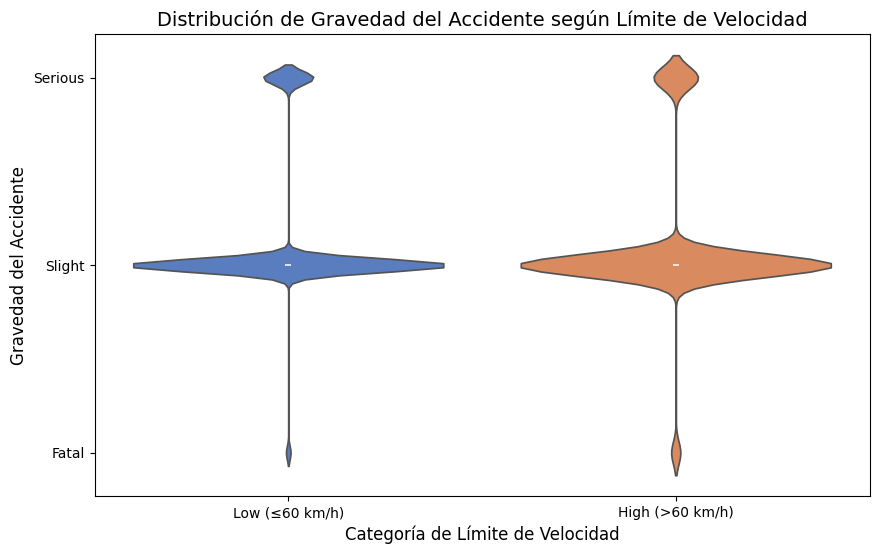

In [11]:
# Se crea una nueva columna categórica para clasificar el límite de velocidad
data['Speed Category'] = data['Speed limit'].apply(lambda x: 'High (>60 km/h)' if x > 60 else 'Low (≤60 km/h)')

# Agrupar y contar los accidentes por categoría de límite de velocidad y gravedad
grouped_data = data.groupby(['Speed Category', 'Accident Severity']).size().reset_index(name='Count')

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=data,
    x='Speed Category',
    y='Accident Severity',
    palette='muted'
    )
# Personalización del gráfico
plt.title('Distribución de Gravedad del Accidente según Límite de Velocidad', fontsize=14)
plt.xlabel('Categoría de Límite de Velocidad', fontsize=12)
plt.ylabel('Gravedad del Accidente', fontsize=12)

# Mostrar el gráfico
plt.show()

A partir del gráfico de violín mostrado, podemos hacer las siguientes observaciones y conclusiones:



**1.   Distribución de la gravedad del accidente según el límite de velocidad:**
  *   En las áreas con límite de velocidad bajo (≤60 km/h), la mayoría de los accidentes son de gravedad leve (Slight), y los accidentes graves (Serious) o fatales (Fatal) son mucho menos frecuentes.
  *   En las áreas con límite de velocidad alto (>60 km/h), se observa un patrón similar: predominan los accidentes leves (Slight), pero hay una ligera mayor presencia relativa de accidentes graves y fatales en comparación con las áreas de velocidad baja.


**2.   Concentración en accidentes leves:**
  *   En ambos casos, la distribución es mucho más ancha para los accidentes leves (Slight), lo que indica que este tipo de gravedad domina en todas las velocidades.

**3.   Diferencias entre límites altos y bajos:**
  *   En áreas de velocidad alta (>60 km/h), se nota una mayor probabilidad relativa de que los accidentes sean graves o fatales en comparación con áreas de velocidad baja.
  *   Esto respalda parcialmente la hipótesis de que los límites de velocidad más altos tienden a estar asociados con accidentes más severos.

**Conclusión:**

La mayoría de los accidentes, independientemente del límite de velocidad, son de gravedad leve.
Sin embargo, los accidentes graves y fatales son más comunes, aunque no predominantes, en áreas con límites de velocidad altos (>60 km/h), lo que sugiere que la velocidad puede influir en la severidad del accidente.

Este análisis sugiere que la reducción de los límites de velocidad en zonas críticas (por ejemplo, áreas urbanas o intersecciones) podría ser una estrategia efectiva para disminuir la severidad de los accidentes.